In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [14]:
os.getcwd()
os.chdir(r'C:\Users\sherw\OneDrive\Desktop\VS_HW2\Inputs')

In [15]:
img = cv2.imread('Rice.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

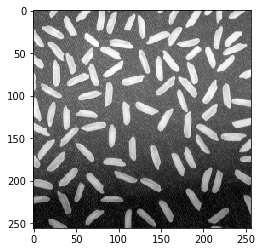

In [16]:
plt.imshow(img_gray,'gray')

In [17]:
blurred = cv2.GaussianBlur(img_gray,(3,3),0)
# edges = cv2.threshold(blurred,120,255,0)
# edges = edges[1]
edges = cv2.Canny(blurred,100,150)

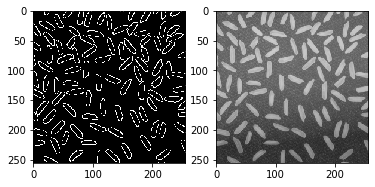

In [18]:
plt.subplot(1,2,1)
plt.imshow(edges,'gray',vmin= 0,vmax = 255)
plt.subplot(1,2,2)
plt.imshow(img,'gray',vmin= 0,vmax = 255)

In [19]:
contours, hierarchy = cv2.findContours(edges,  cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_NONE) 

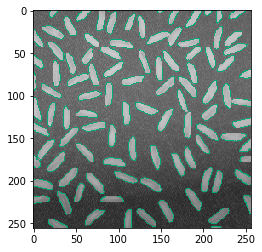

In [20]:
img = cv2.imread('Rice.png')
black = np.zeros(img.shape)
cv2.drawContours(img, contours, -1,(0,170,120), 1)
plt.imshow(img)



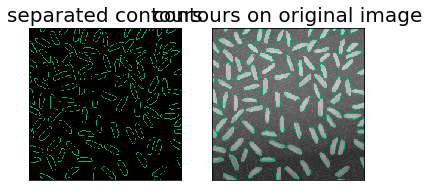

In [52]:
img = cv2.imread('Rice.png')
img2 = img.copy()
black = np.zeros(img.shape)

plt.subplot(1,2,1)
cv2.drawContours(black, contours, -1,(0,170,120), 1)
plt.imshow(black.astype(np.int),vmin = 0,vmax = 255)
plt.xticks([])
plt.yticks([])
plt.title('separated contours',size = 20)

plt.subplot(1,2,2)
cv2.drawContours(img2, contours, -1,(0,170,120), 1)
plt.imshow(img2,vmin = 0,vmax = 255)
plt.xticks([])
plt.yticks([])
plt.title('contours on original image',size = 20)

plt.savefig('p5a.png')
plt.show()

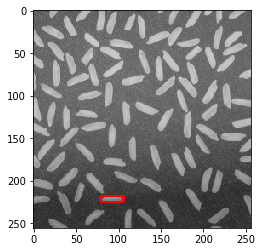

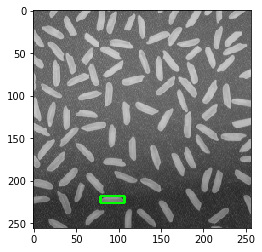

In [53]:
ind = 7
img = cv2.imread('Rice.png')
rect = cv2.minAreaRect(contours[ind])
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(img,[box],0,(255,0,0),2)
plt.imshow(im)
plt.show()

img = cv2.imread('Rice.png')
x,y,w,h = cv2.boundingRect(contours[ind])
im2 = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(im2)
plt.show()

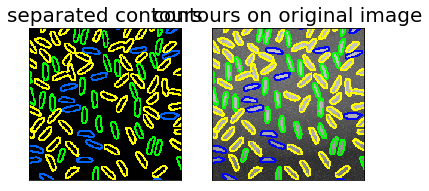

In [74]:
verticals = []
horizontals = []
none = []
for cont in contours:
    x,y,width, height = cv2.boundingRect(cont)
    if width / height >= 1.8:
        horizontals.append(cont)
    elif height / width >= 1.7:
        verticals.append(cont)
    else:
        none.append(cont)

black = np.zeros(img.shape)
        
plt.subplot(1,2,1)
cv2.drawContours(black, horizontals, -1,(0,100,255), 2)
cv2.drawContours(black, verticals, -1,(0,255,0), 2)
cv2.drawContours(black, none, -1,(255,255,0), 2)
plt.imshow(black.astype(np.int),vmin = 0,vmax = 255)
plt.xticks([])
plt.yticks([])
plt.title('separated contours',size = 20)        

plt.subplot(1,2,2)
img = cv2.imread('Rice.png')
cv2.drawContours(img, horizontals, -1,(0,0,255), 2)
cv2.drawContours(img, verticals, -1,(0,255,0), 2)
cv2.drawContours(img, none, -1,(255,255,0), 2)
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.title('contours on original image',size = 20)

plt.savefig('p5.png')
plt.show()